# Actividad 3
# Evaluación de la segmentación

## Autores:
- José Antonio Betances Vargas
- Jacobo Farray Rodríguez
- Pedro Alejandro González Morales
- Jean Michael Urday García

Ausente: José Enrique Cabrera Pérez

## Fecha de reuniones:

| Fecha | J. A. Betance Vargas | J. Farray Rodríguez | P. A. González Morales | J. M. Urday Garcia | J. E. Cabrera Pérez |
| -- | -- | -- | -- | -- | -- |
| 14.06.2021 | Ok | Ok | Ok | Ok | No |
| 15.06.2021 |Ok | Ok | Ok | Ok | No |
| 16.06.2021 | Ok | Ok | Ok | Ok | No |

# Segmentación de imágenes de células

Leemos la imagen y la pasamos a escala de grises

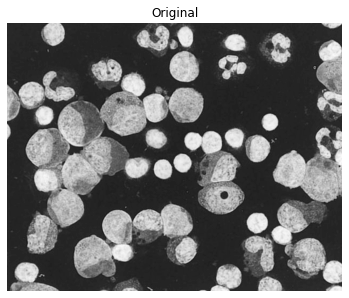

In [77]:
# Lectura de imagen
import cv2

img_color = cv2.imread('cells3.jpg') # (Ansar, 2018)
cells = 255-cv2.cvtColor(img_color ,cv2.COLOR_BGR2GRAY)

from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(6,8))                     
ax.imshow(cells, cmap="gray")
ax.set_title("Original", fontsize=12)
ax.set_axis_off()

## GroundTruth

Como no tenemos una segmentación verdadera, consideraremos al resultado de usar el método Watershed sobre la imagen original considerando dos *thresholds* obtenidos con el método Multi-Otsu con cinco clases como nuestro GroundTruth. Con esto, podremos comparar el resto de métodos entre sí usando esto como referencia, es decir, haremos una comparación relativa al método Watershed.

In [2]:
# Watershed
from skimage.segmentation import watershed
from skimage.filters import threshold_multiotsu
import numpy as np

markers = np.zeros_like(cells)
thresholds = threshold_multiotsu(cells, classes=5)
markers[cells < thresholds[0]] = 1 # Background
markers[cells > thresholds[1]] = 2 # Foreground
fill_cells_water = watershed(cells, markers)

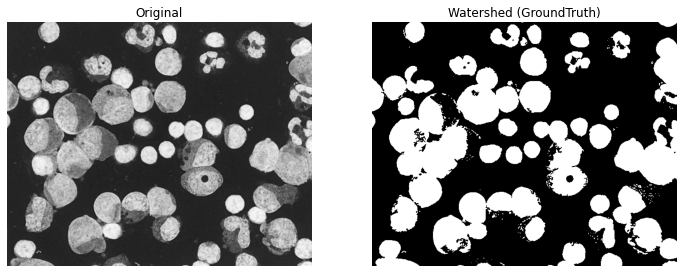

In [3]:
# Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
ax = axes.flatten()
ax[0].imshow(cells, cmap="gray")
ax[0].set_title("Original", fontsize=12)
ax[0].set_axis_off()
ax[1].imshow(fill_cells_water, cmap="gray")
ax[1].set_title("Watershed (GroundTruth)", fontsize=12)
ax[1].set_axis_off()

## Método 1: Canny + FillingHoles

Tratamos de mejorar el resultado paso a paso, para ello vamos a detectar los bordes con el filtro Canny y rellenar los espacios cerrados.

In [4]:
# Bordes y rellenado
from skimage.feature import canny
from scipy import ndimage as ndi

edges = canny(cells/255.)
fill_cells = ndi.binary_fill_holes(edges)

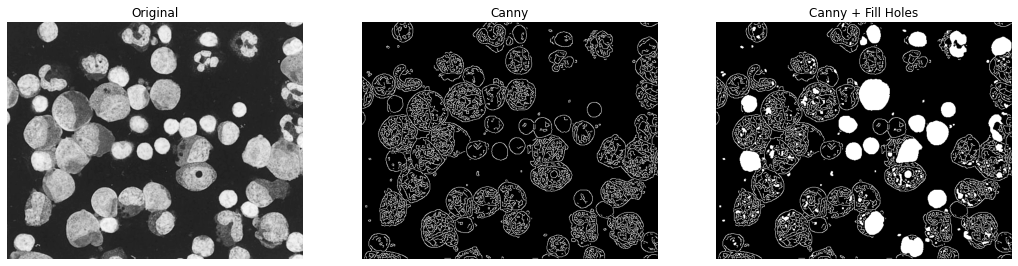

In [5]:
# Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
ax = axes.flatten()
ax[0].imshow(cells, cmap="gray")
ax[0].set_title("Original", fontsize=12)
ax[0].set_axis_off()
ax[1].imshow(edges, cmap="gray")
ax[1].set_title("Canny", fontsize=12)
ax[1].set_axis_off()
ax[2].imshow(fill_cells, cmap="gray")
ax[2].set_title("Canny + Fill Holes", fontsize=12)
ax[2].set_axis_off()

Visualmente observamos que se detectan bordes pero al no estar cerrados, no se rellenan correctamente. 

## Método 2: Canny + Sobel + FillingHoles

Aplicamos el método Sobel sobre los bordes detectados y rellenamos los huecos cerrados.

In [6]:
# Elevation map
from skimage.filters import sobel

elevation_map = sobel(edges)
fill_cells_elmap = ndi.binary_fill_holes(elevation_map)

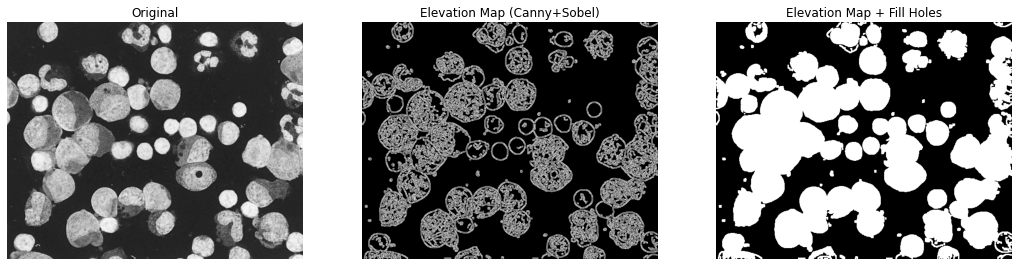

In [7]:
# Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
ax = axes.flatten()
ax[0].imshow(cells, cmap="gray")
ax[0].set_title("Original", fontsize=12)
ax[0].set_axis_off()
ax[1].imshow(elevation_map, cmap="gray")
ax[1].set_title("Elevation Map (Canny+Sobel)", fontsize=12)
ax[1].set_axis_off()
ax[2].imshow(fill_cells_elmap, cmap="gray")
ax[2].set_title("Elevation Map + Fill Holes", fontsize=12)
ax[2].set_axis_off()

Visualmente observamos que al aplicar Sobel sobre los bordes mejora el resultado de rellenado debido a que se cierran más huecos. 

## Método 3: Canny + Sobel + Watershed

En lugar de rellenar huecos cerrados, aplicamos Watershed sobre el mapa de elevación obtenido con Sobel.

In [8]:
# Canny + Sobel + Watershed
markers = np.zeros_like(elevation_map)
markers[cells < thresholds[0]] = 1 # Background
markers[cells > thresholds[1]] = 2 # Foreground
fill_cells_water2 = watershed(elevation_map, markers)

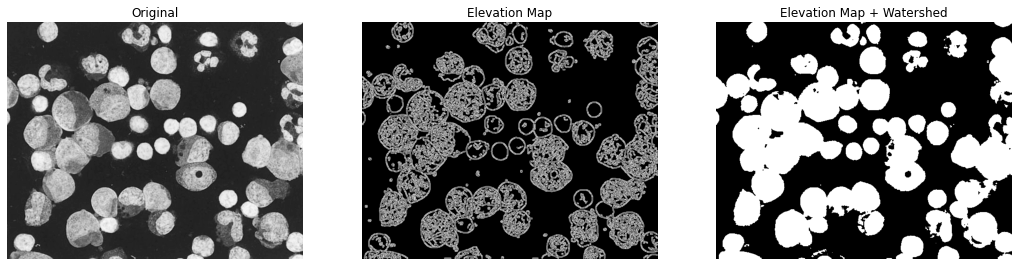

In [9]:
# Plots 
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
ax = axes.flatten()
ax[0].imshow(cells, cmap="gray")
ax[0].set_title("Original", fontsize=12)
ax[0].set_axis_off()
ax[1].imshow(elevation_map, cmap="gray")
ax[1].set_title("Elevation Map", fontsize=12)
ax[1].set_axis_off()
ax[2].imshow(fill_cells_water2, cmap="gray")
ax[2].set_title("Elevation Map + Watershed", fontsize=12)
ax[2].set_axis_off()

Visualmente observamos que el resultado es muy parecido al obtenido con el Método 2.

## Método 4: Sobel + Watershed

Ahora en lugar de aplicar Sobel sobre los bordes detectados, lo hacemos sobre la imagen original y luego procedemos a usar Watershed haciendo la misma elección de *thresholds* con Multi-Otsu.

In [17]:
# Sobel
cells_sobel = sobel(cells)

thresholds = threshold_multiotsu(cells, classes=5)
markers = np.zeros_like(cells)
markers[cells < thresholds[0]] = 1 # Background
markers[cells > thresholds[1]] = 2 # Foreground
fill_cells_sobel = watershed(cells_sobel, markers)

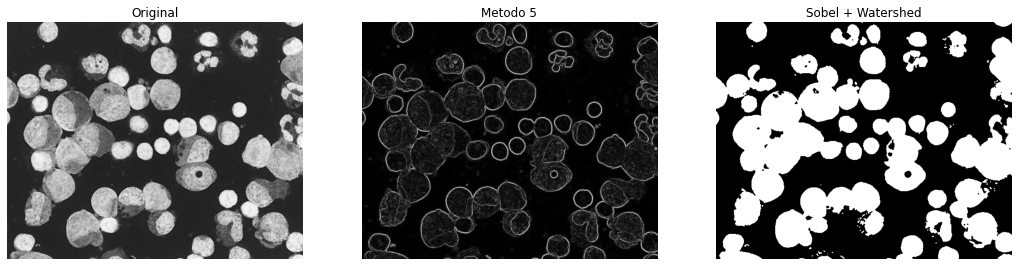

In [18]:
# Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
ax = axes.flatten()
ax[0].imshow(cells, cmap="gray")
ax[0].set_title("Original", fontsize=12)
ax[0].set_axis_off()
ax[1].imshow(cells_sobel, cmap="gray")
ax[1].set_title("Metodo 5", fontsize=12)
ax[1].set_axis_off()
ax[2].imshow(fill_cells_sobel, cmap="gray")
ax[2].set_title("Sobel + Watershed", fontsize=12)
ax[2].set_axis_off()

Visualmente observamos que Sobel hace un mejor trabajo que Canny cerrando los bordes y el resultado es muy similar al GroundTruth.

## Método 5: Chan-Vese

Para el último método, realizamos la segmentación con el método Chan-Vese. Este método es apropiado cuando los bordes no están bien definidos.

In [12]:
# Chan-Vese
from skimage.segmentation import chan_vese

cv = chan_vese(cells, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set="checkerboard", extended_output=True)

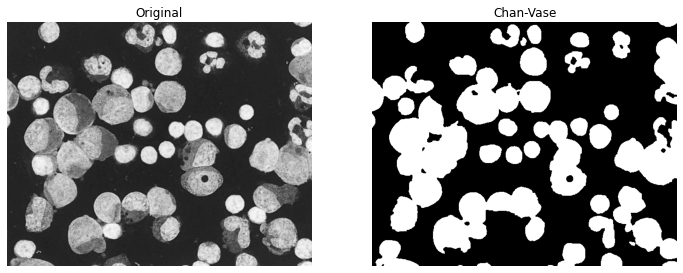

In [13]:
# Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
ax = axes.flatten()
ax[0].imshow(cells, cmap="gray")
ax[0].set_title("Original", fontsize=12)
ax[0].set_axis_off()
ax[1].imshow(cv[0], cmap="gray")
ax[1].set_title("Chan-Vase", fontsize=12)
ax[1].set_axis_off()

Visualmente observamos que Chan-Vase hace un buen trabajo segmentando la imagen, ofreciendo un resultado muy similar al GroundTruth.

## Métricas

Vamos a usar el error relativo, el informe de clasificación y el índice de Jaccard como métricas para comparar numéricamente los resultados. Además, mostraremos en una figura el error relativo.

### Visual : Error Relativo

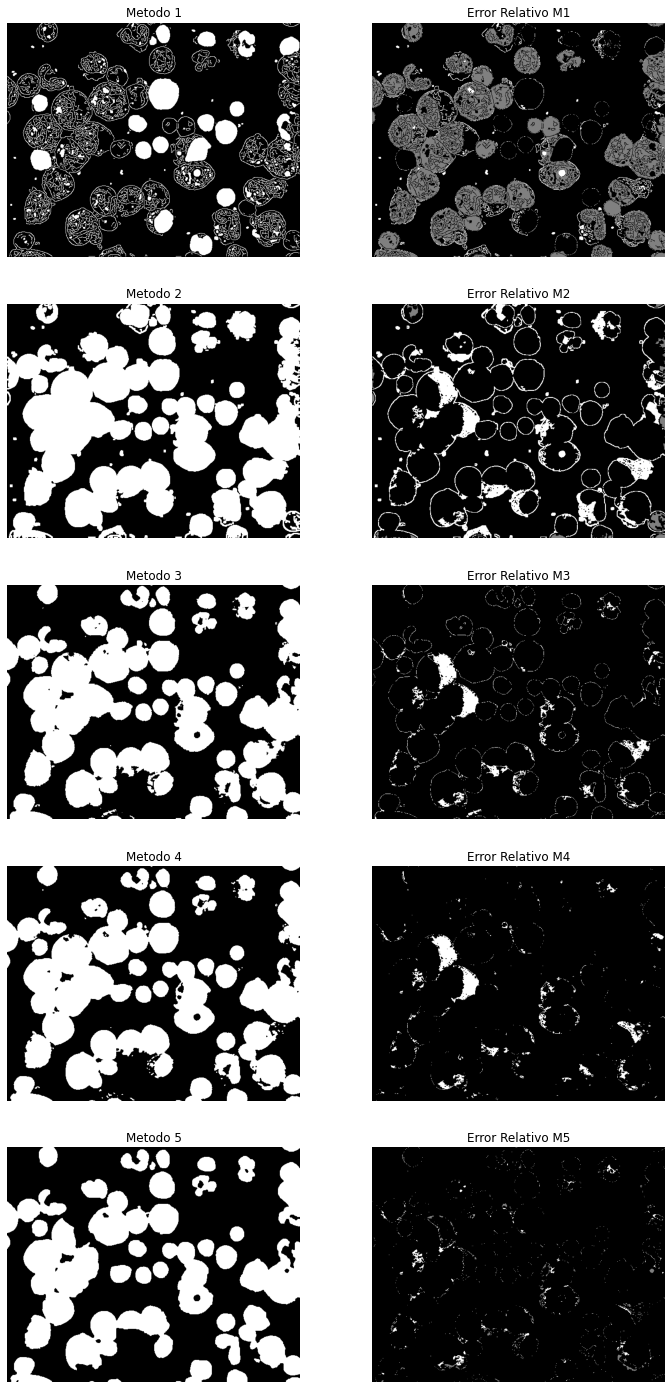

In [47]:
fig, axes = plt.subplots(5, 2, figsize=(12, 25))
ax = axes.flatten()

error_abs=abs(fill_cells_water-(fill_cells+1))
error_rel=error_abs/fill_cells_water
ax[0].set_title("Metodo 1", fontsize=12)
ax[0].imshow(fill_cells, cmap="gray")
ax[0].set_axis_off()
ax[1].set_title("Error Relativo M1", fontsize=12)
ax[1].imshow(error_rel, cmap="gray")
#ax[1].imshow((fill_cells+1)/fill_cells_water, cmap="gray")
ax[1].set_axis_off()

error_abs=abs(fill_cells_water-(fill_cells_elmap+1))
error_rel=error_abs/fill_cells_water
ax[2].set_title("Metodo 2", fontsize=12)
ax[2].imshow(fill_cells_elmap, cmap="gray")
ax[2].set_axis_off()
ax[3].set_title("Error Relativo M2", fontsize=12)
#ax[3].imshow((fill_cells_elmap+1)/fill_cells_water, cmap="gray")
ax[3].imshow(error_abs/fill_cells_water, cmap="gray")
ax[3].set_axis_off()

error_abs=abs(fill_cells_water-fill_cells_water2)
error_rel=error_abs/fill_cells_water
ax[4].set_title("Metodo 3", fontsize=12)
ax[4].imshow(fill_cells_water2, cmap="gray")
ax[4].set_axis_off()
ax[5].set_title("Error Relativo M3", fontsize=12)
#ax[5].imshow(fill_cells_water2/fill_cells_water, cmap="gray")
ax[5].imshow(error_abs/fill_cells_water, cmap="gray")
ax[5].set_axis_off()

error_abs=abs(fill_cells_water-fill_cells_sobel)
error_rel=error_abs/fill_cells_water
ax[6].set_title("Metodo 4", fontsize=12)
ax[6].imshow(fill_cells_sobel, cmap="gray")
ax[6].set_axis_off()
ax[7].set_title("Error Relativo M4", fontsize=12)
#ax[7].imshow(fill_cells_sobel/fill_cells_water, cmap="gray")
ax[7].imshow(error_abs/fill_cells_water, cmap="gray")
ax[7].set_axis_off()

error_abs=abs(fill_cells_water-(cv[0]+1))
error_rel=error_abs/fill_cells_water
ax[8].set_title("Metodo 5", fontsize=12)
ax[8].imshow(cv[0], cmap="gray")
ax[8].set_axis_off()
ax[9].set_title("Error Relativo M5", fontsize=12)
#ax[9].imshow((cv[0]+1)/fill_cells_water, cmap="gray")
ax[9].imshow(error_abs/fill_cells_water, cmap="gray")
ax[9].set_axis_off()

### Informes de Clasificación

- **Presición**: ratio de ejemplos que son verdaderamente positivos, nos da información sobre el rendimiento con respecto a los falsos positivos (cuántos se han acertado).
- **Recall**: ratio de ejemplos positivos correctamente clasificados, nos da información sobre el rendimiento con respecto a falsos negativos (cuántos fallaron).
- **F$_1$-score**: combina precisión y recall utilizando la media armónica.
- **Exactitud** (accuracy): es el número de predicciones correctas con respecto al número total de estas.

In [80]:
from sklearn.metrics import classification_report

print('Informes de Clasificación: \n')
target_names = ['Background', 'Foreground']
print('* Método 1 *')
print(classification_report(fill_cells_water.flatten(), fill_cells.flatten()+1, target_names=target_names))
print('* Método 2 *')
print(classification_report(fill_cells_water.flatten(), fill_cells_elmap.flatten()+1, target_names=target_names))
print('* Método 3 *')
print(classification_report(fill_cells_water.flatten(), fill_cells_water2.flatten(), target_names=target_names))
print('* Método 4 *')
print(classification_report(fill_cells_water.flatten(), fill_cells_sobel.flatten(), target_names=target_names))
print('* Método 5 *')
print(classification_report(fill_cells_water.flatten(), cv[0].flatten()+1, target_names=target_names))

Informes de Clasificación: 

* Método 1 *
              precision    recall  f1-score   support

  Background       0.73      0.95      0.82    195435
  Foreground       0.83      0.41      0.55    117065

    accuracy                           0.75    312500
   macro avg       0.78      0.68      0.69    312500
weighted avg       0.77      0.75      0.72    312500

* Método 2 *
              precision    recall  f1-score   support

  Background       0.98      0.82      0.89    195435
  Foreground       0.76      0.98      0.86    117065

    accuracy                           0.88    312500
   macro avg       0.87      0.90      0.87    312500
weighted avg       0.90      0.88      0.88    312500

* Método 3 *
              precision    recall  f1-score   support

  Background       1.00      0.93      0.96    195435
  Foreground       0.89      1.00      0.94    117065

    accuracy                           0.96    312500
   macro avg       0.95      0.96      0.95    312500
weight

### Índices de Jaccard

Este índice es una medida de la similitud que existe entre dos grupos, en nuestro caso, las clasificaciones realizadas por el segmentador.

In [15]:
# Métricas
from sklearn.metrics import jaccard_score

# Metodo 1
met1 = jaccard_score(fill_cells_water.flatten(), fill_cells.flatten()+1,average='macro')
# Metodo 2
met2 = jaccard_score(fill_cells_water.flatten(), fill_cells_elmap.flatten()+1,average='macro')
# Metodo 3
met3 = jaccard_score(fill_cells_water.flatten(), fill_cells_water2.flatten(),average='macro')
# Metodo 4
met4 = jaccard_score(fill_cells_water.flatten(), fill_cells_sobel.flatten(),average='macro')
# Metodo 5
met5 = jaccard_score(fill_cells_water.flatten(), cv[0].flatten()+1,average='macro')

print('Índices de Jaccard')
print('- Método 1: %2.5f' % met1)
print('- Método 2: %2.5f' % met2)
print('- Método 3: %2.5f' % met3)
print('- Método 4: %2.5f' % met4)
print('- Método 5: %2.5f' % met5)

Índices de Jaccard
- Método 1: 0.53954
- Método 2: 0.77677
- Método 3: 0.91131
- Método 4: 0.93585
- Método 5: 0.96476


Vemos que tanto la exactitud como el **F**$_1$-score crece con el número del Método y que lo mismo ocurre con la similitud de cada Método con el GrounTruth (valores de las métricas más próximos a la unidad). Tenemos que los Métodos 3, 4 y 5 son los que mejores resultados dan, siendo el Método 5 el más parecido a aplicar Watershed directamente. Eso puede observarse en las columna de la derecha; a medida que aumenta el número del Método, el error relativo disminuye (aparecen menos blancas).

## Bibliografía
- Ansar. (2018, March 12). White blood cells segmentation. En *Image.sc Forum*. Recuperado el 14 de junio 2021 de https://forum.image.sc/t/white-blood-cells-segmentation/13491.